# Data Processing and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',low_memory=False)

In [3]:
df.shape

(2260701, 151)

In [4]:
df.isnull().any().any()

True

In [5]:
df.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [6]:
#Delating columns, where every value is null
for column in df.columns:
    if df[column].isnull().values.all() == True:
        del df[column]

In [7]:
df.shape

(2260701, 150)

In [8]:
# delating columns with huge number of nulls
for column in df.columns:
    if df[column].isnull().values.sum() > 500000:
        del df[column]

In [9]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [10]:
# choosing features which don't come from future and can be used in classyfing loan status
columns_list = ['loan_amnt', 'term', 'int_rate','sub_grade', 'emp_length','installment',
           'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
           'loan_status','purpose','earliest_cr_line','fico_range_low',
           'application_type', 'addr_state','title','emp_title','dti','pub_rec',
           'revol_bal', 'revol_util']

### Source: https://www.kaggle.com/jonchan2003/lending-club-data-dictionary

In [11]:
columns_to_delete = [column for column in df.columns if column not in columns_list]

In [12]:
df.drop(columns=columns_to_delete,axis='columns',inplace=True)

In [13]:
df.head()

loan_amnt        term  int_rate  installment sub_grade  \
0     3600.0   36 months     13.99       123.03        C4   
1    24700.0   36 months     11.99       820.28        C1   
2    20000.0   60 months     10.78       432.66        B4   
3    35000.0   60 months     14.85       829.90        C5   
4    10400.0   60 months     22.45       289.91        F1   

                     emp_title emp_length home_ownership  annual_inc  \
0                      leadman  10+ years       MORTGAGE     55000.0   
1                     Engineer  10+ years       MORTGAGE     65000.0   
2                 truck driver  10+ years       MORTGAGE     63000.0   
3  Information Systems Officer  10+ years       MORTGAGE    110000.0   
4          Contract Specialist    3 years       MORTGAGE    104433.0   

  verification_status  ...             purpose               title addr_state  \
0        Not Verified  ...  debt_consolidation  Debt consolidation         PA   
1        Not Verified  ...      small_business            Business         SD   
2        Not Verified  ...    home_improvement                 NaN         IL   
3     Source Verified  ...  debt_consolidation  Debt consolidation         NJ   
4     Source Verified  ...      major_purchase      Major purchase         PA   

     dti earliest_cr_line  fico_range_low pub_rec  revol_bal  revol_util  \
0   5.91         Aug-2003           675.0     0.0     2765.0        29.7   
1  16.06         Dec-1999           715.0     0.0    21470.0        19.2   
2  10.78         Aug-2000           695.0     0.0     7869.0        56.2   
3  17.06         Sep-2008           785.0     0.0     7802.0        11.6   
4  25.37         Jun-1998           695.0     0.0    21929.0        64.5   

   application_type  
0        Individual  
1        Individual  
2         Joint App  
3        Individual  
4        Individual  

[5 rows x 22 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   term                 object 
 2   int_rate             float64
 3   installment          float64
 4   sub_grade            object 
 5   emp_title            object 
 6   emp_length           object 
 7   home_ownership       object 
 8   annual_inc           float64
 9   verification_status  object 
 10  issue_d              object 
 11  loan_status          object 
 12  purpose              object 
 13  title                object 
 14  addr_state           object 
 15  dti                  float64
 16  earliest_cr_line     object 
 17  fico_range_low       float64
 18  pub_rec              float64
 19  revol_bal            float64
 20  revol_util           float64
 21  application_type     object 
dtypes: float64(9), object(13)
memory usage: 379.5+ MB


In [15]:
df.describe(include='object')

term sub_grade emp_title emp_length home_ownership  \
count      2260668   2260668   2093699    2113761        2260668   
unique           2        35    512694         11              6   
top      36 months        C1   Teacher  10+ years       MORTGAGE   
freq       1609754    145903     38824     748005        1111450   

       verification_status   issue_d loan_status             purpose  \
count              2260668   2260668     2260668             2260668   
unique                   3       139           9                  14   
top        Source Verified  Mar-2016  Fully Paid  debt_consolidation   
freq                886231     61992     1076751             1277877   

                     title addr_state earliest_cr_line application_type  
count              2237343    2260668          2260639          2260668  
unique               63155         51              754                2  
top     Debt consolidation         CA         Sep-2004       Individual  
freq               1153293     314533            15400          2139958

In [16]:
# Checking the target
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [17]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df = df.reset_index(drop=True)

In [18]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              85785
emp_length             78511
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  16659
addr_state                 0
dti                      374
earliest_cr_line           0
fico_range_low             0
pub_rec                    0
revol_bal                  0
revol_util               857
application_type           0
dtype: int64

In [19]:
df.issue_d.value_counts()

Mar-2016    48937
Oct-2015    42986
Jul-2015    41053
Dec-2015    39002
Oct-2014    36072
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue_d, Length: 139, dtype: int64

In [20]:
df.earliest_cr_line.value_counts()

Aug-2001    9391
Aug-2002    9083
Sep-2003    9029
Oct-2001    8855
Sep-2004    8848
            ... 
Jun-1955       1
Apr-1934       1
Jan-1946       1
May-1950       1
Dec-1951       1
Name: earliest_cr_line, Length: 739, dtype: int64

In [21]:
df['issue_d_year'] = df['issue_d'].apply(lambda x: int(x[4::]))
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[4::]))

In [22]:
credit_age = [int(df['issue_d_year'][i])-int(df['earliest_cr_line'][i]) for i in range(len(df))]
df['credit_age'] = credit_age

In [23]:
df.head()

loan_amnt        term  int_rate  installment sub_grade  \
0     3600.0   36 months     13.99       123.03        C4   
1    24700.0   36 months     11.99       820.28        C1   
2    20000.0   60 months     10.78       432.66        B4   
3    10400.0   60 months     22.45       289.91        F1   
4    11950.0   36 months     13.44       405.18        C3   

              emp_title emp_length home_ownership  annual_inc  \
0               leadman  10+ years       MORTGAGE     55000.0   
1              Engineer  10+ years       MORTGAGE     65000.0   
2          truck driver  10+ years       MORTGAGE     63000.0   
3   Contract Specialist    3 years       MORTGAGE    104433.0   
4  Veterinary Tecnician    4 years           RENT     34000.0   

  verification_status  ... addr_state    dti earliest_cr_line fico_range_low  \
0        Not Verified  ...         PA   5.91             2003          675.0   
1        Not Verified  ...         SD  16.06             1999          715.0   
2        Not Verified  ...         IL  10.78             2000          695.0   
3     Source Verified  ...         PA  25.37             1998          695.0   
4     Source Verified  ...         GA  10.20             1987          690.0   

  pub_rec  revol_bal  revol_util  application_type  issue_d_year  credit_age  
0     0.0     2765.0        29.7        Individual          2015          12  
1     0.0    21470.0        19.2        Individual          2015          16  
2     0.0     7869.0        56.2         Joint App          2015          15  
3     0.0    21929.0        64.5        Individual          2015          17  
4     0.0     8822.0        68.4        Individual          2015          28  

[5 rows x 24 columns]

In [24]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [25]:
df['emp_length'][~df.emp_length.isnull()] = df['emp_length'][~df.emp_length.isnull()].apply(lambda x: int(x.replace('< ','0 ')[0:2]))

/tmp/ipykernel_800745/1500142892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'][~df.emp_length.isnull()] = df['emp_length'][~df.emp_length.isnull()].apply(lambda x: int(x.replace('< ','0 ')[0:2]))


In [26]:
df.emp_length.unique()

array([10.0, 3.0, 4.0, 6.0, 7.0, 8.0, 2.0, 5.0, 9.0, 0.0, 1.0, nan],
      dtype=object)

In [27]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [28]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              85785
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  16659
addr_state                 0
dti                      374
earliest_cr_line           0
fico_range_low             0
pub_rec                    0
revol_bal                  0
revol_util               857
application_type           0
issue_d_year               0
credit_age                 0
dtype: int64

In [29]:
df['dti'].fillna(df['dti'].median(), inplace=True)

In [30]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

In [31]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [32]:
df['term'] = df['term'].apply(lambda x: int(x.replace(' ','').replace('months','')))

In [33]:
df.head(4)

loan_amnt  term  int_rate  installment sub_grade            emp_title  \
0     3600.0    36     13.99       123.03        C4              leadman   
1    24700.0    36     11.99       820.28        C1             Engineer   
2    20000.0    60     10.78       432.66        B4         truck driver   
3    10400.0    60     22.45       289.91        F1  Contract Specialist   

   emp_length home_ownership  annual_inc verification_status  ... addr_state  \
0        10.0       MORTGAGE     55000.0        Not Verified  ...         PA   
1        10.0       MORTGAGE     65000.0        Not Verified  ...         SD   
2        10.0       MORTGAGE     63000.0        Not Verified  ...         IL   
3         3.0       MORTGAGE    104433.0     Source Verified  ...         PA   

     dti earliest_cr_line fico_range_low pub_rec  revol_bal  revol_util  \
0   5.91             2003          675.0     0.0     2765.0        29.7   
1  16.06             1999          715.0     0.0    21470.0        19.2   
2  10.78             2000          695.0     0.0     7869.0        56.2   
3  25.37             1998          695.0     0.0    21929.0        64.5   

   application_type  issue_d_year  credit_age  
0        Individual          2015          12  
1        Individual          2015          16  
2         Joint App          2015          15  
3        Individual          2015          17  

[4 rows x 24 columns]

In [34]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              85785
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  16659
addr_state                 0
dti                        0
earliest_cr_line           0
fico_range_low             0
pub_rec                    0
revol_bal                  0
revol_util                 0
application_type           0
issue_d_year               0
credit_age                 0
dtype: int64

In [35]:
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objects as go

## Target balance

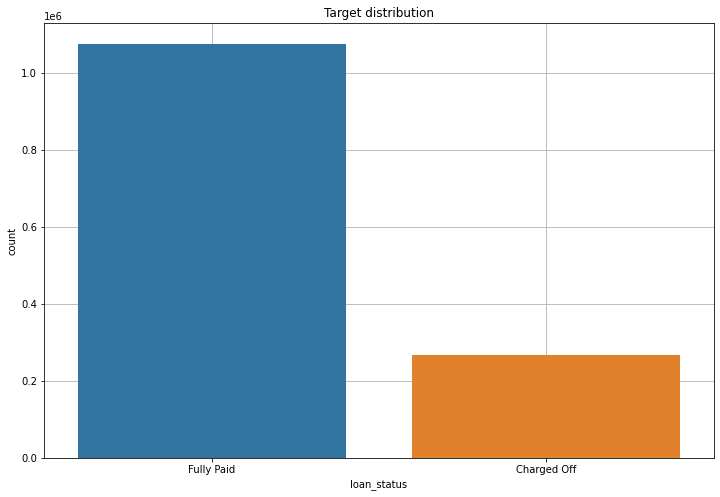

In [36]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.countplot(data=df, x='loan_status',zorder=3)
ax.grid(zorder=0)
plt.title('Target distribution')
plt.show()

### Data is unbalanced. There are much more paid loans than unpaid

In [37]:
# function which generate boxplot with median
def create_median_box(df,x,y,title,x_label,y_label,tuple_ylim):
    plt.figure(figsize=(12,8))
    box_plot = sns.boxplot(x=x,y=y,
                           data=df.sort_values(by=x,ascending=True))

    medians = df.groupby([x])[y].median()
    vertical_offset = df[y].median() * 0.01

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,medians[xtick] - vertical_offset,medians[xtick], 
                horizontalalignment='center',size=14,color='w',weight='semibold')

    plt.title(title,size=16)
    box_plot.set_ylabel(y_label,size=14)
    box_plot.set_xlabel(x_label, size=14)
    box_plot.set(ylim=tuple_ylim)


    plt.show()

## FICO and repayment

In [38]:
from scipy.stats import ttest_ind

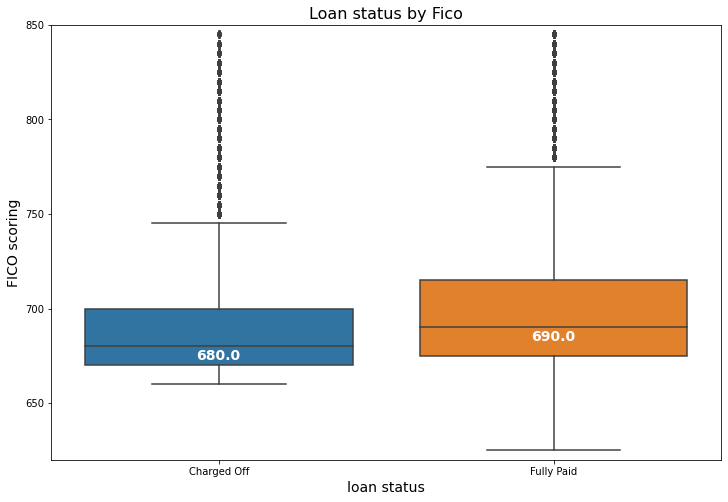

In [39]:
create_median_box(df,'loan_status','fico_range_low','Loan status by Fico','loan status','FICO scoring',(620,max(df.fico_range_low)+5))

In [40]:
data1 = df.fico_range_low[(df.loan_status == 'Charged Off')].values
data2 = df.fico_range_low[(df.loan_status == 'Fully Paid')].values

In [41]:
print('H0 - FICO means are the same \nH1 - FICO means are different')
stat, p = ttest_ind(data1,data2)

print(f'stat:{stat:.7f}, p:{p:.15f}')

if p > 0.05:
    print('Probably the same mean')
else:
    print('Different means')

H0 - FICO means are the same 
H1 - FICO means are different
stat:-152.8873342, p:0.000000000000000
Different means


### FICO score is different in both groups. For paid loans FICO is higher than for unpaid loans. 

## DTI and repayment

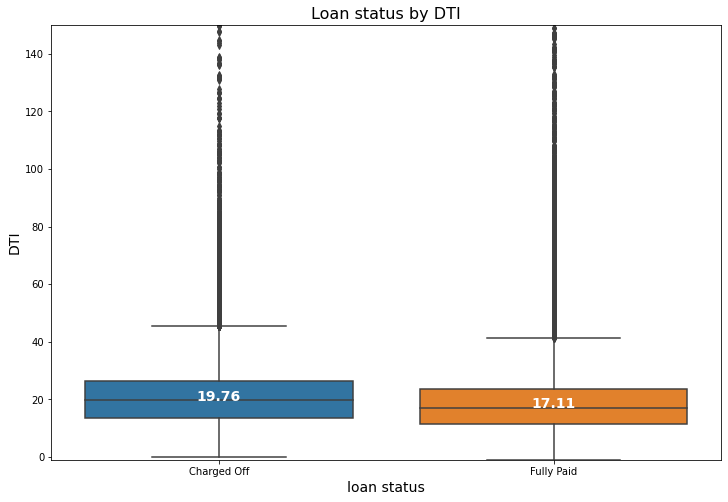

In [42]:
create_median_box(df,'loan_status','dti','Loan status by DTI','loan status','DTI',(-1,150))

In [43]:
data1 = df.dti[(df.loan_status == 'Charged Off')].values
data2 = df.dti[(df.loan_status == 'Fully Paid')].values

In [44]:
print('H0 - DTI means are the same \nH1 - DTI means are different')
stat, p = ttest_ind(data1,data2)

print(f'stat:{stat:.7f}, p:{p:.15f}')

if p > 0.05:
    print('Probably the same mean')
else:
    print('Different means')

H0 - DTI means are the same 
H1 - DTI means are different
stat:98.3600840, p:0.000000000000000
Different means


## Credit age and repayment

In [45]:
credit_age_rank = []
for record in df.credit_age:
    if record <= 10:
        credit_age_rank.append(0)
    elif record >10 and record <21:
        credit_age_rank.append(1)
    elif record>20:
        credit_age_rank.append(2)
df['credit_age_rank']= credit_age_rank

In [46]:
sorted_loans = df.sort_values(by=['loan_status','credit_age_rank'])

In [47]:
data1 = sorted_loans[(sorted_loans.loan_status == 'Charged Off')].groupby(['credit_age_rank']).count().loan_status.tolist()
data2 = sorted_loans[(sorted_loans.loan_status == 'Fully Paid')].groupby(['credit_age_rank']).count().loan_status.tolist()

In [48]:
unpaid_loans = []
paid_loans = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    unpaid_loans.append(a)
    b = data2[counter]/(element+data2[counter])*100
    paid_loans.append(b)
    counter += 1

In [49]:
percentage = range(0,101,5)
percentage = [str(i)+'%' for i in percentage]
credit_age = ['0-10','11-20','20+']

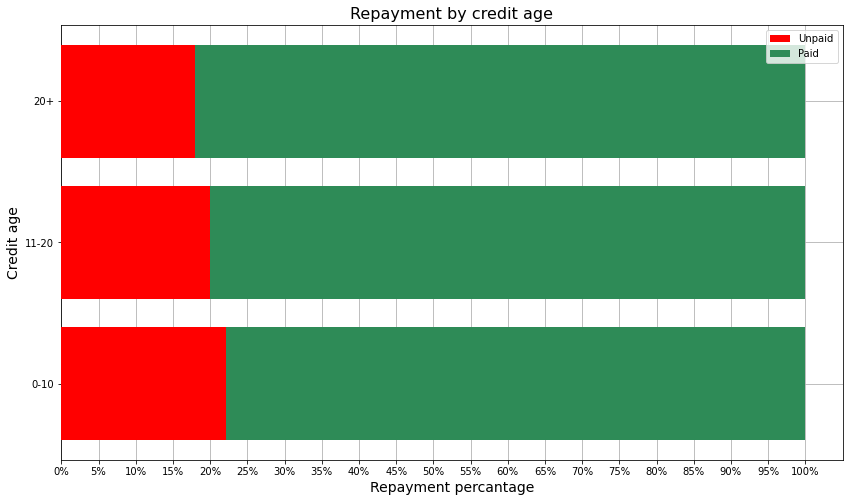

In [50]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

p1 = plt.barh(np.arange(0,3), unpaid_loans, color='red',zorder=3)
p2 = plt.barh(np.arange(0,3), paid_loans, left= unpaid_loans, color='seagreen',zorder=3)

plt.title('Repayment by credit age',size=16)
plt.legend((p1[0], p2[0]), ('Unpaid', 'Paid'))
plt.xlabel('Repayment percantage',size=14)
plt.ylabel('Credit age',size=14)

ax.grid(zorder=0)
ax.set_yticks(np.arange(0,3,1))
ax.set_yticklabels(credit_age)

ax.set_xticks(np.arange(0,101,5))
ax.set_xticklabels(percentage)

plt.show()

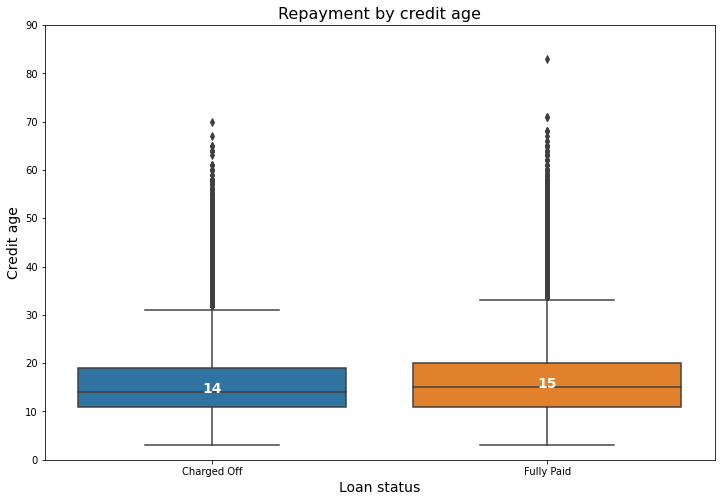

In [51]:
create_median_box(df,'loan_status','credit_age','Repayment by credit age','Loan status','Credit age', (0,90))

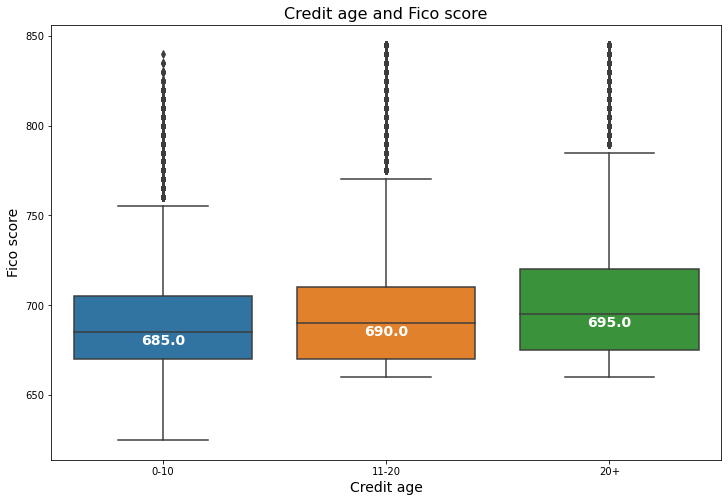

In [52]:
plt.figure(figsize=(12,8))
box_plot = sns.boxplot(x="credit_age_rank",y="fico_range_low",
                       data=df.sort_values(by='credit_age_rank',ascending=True))

medians = df.groupby(['credit_age_rank'])['fico_range_low'].median()
vertical_offset = df['fico_range_low'].median() * 0.01

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] - vertical_offset,medians[xtick], 
            horizontalalignment='center',size=14,color='w',weight='semibold')
    
plt.title('Credit age and Fico score',size=16)
box_plot.set_ylabel('Fico score',size=14)
box_plot.set_xlabel('Credit age', size=14)
box_plot.set_xticklabels(credit_age)

plt.show()

In [53]:
data1 = df.credit_age[(df.loan_status == 'Charged Off')].values
data2 = df.credit_age[(df.loan_status == 'Fully Paid')].values

In [54]:
print('H0 - Mean Age is the same \nH1 - Mean age for both groups is different')
stat, p = ttest_ind(data1,data2)

print(f'stat:{stat:.7f}, p:{p:.22f}')

if p > 0.05:
    print('Probably the same mean')
else:
    print('Different means')

H0 - Mean Age is the same 
H1 - Mean age for both groups is different
stat:-38.7680238, p:0.0000000000000000000000
Different means


### Credit age has an influence on repayment loans. The median for unpaid loans is lower than for paid loans, but if we compare both values, we find minor differances. FICO score is higher for people who bigger credit age
 

## Repayment and Annual income

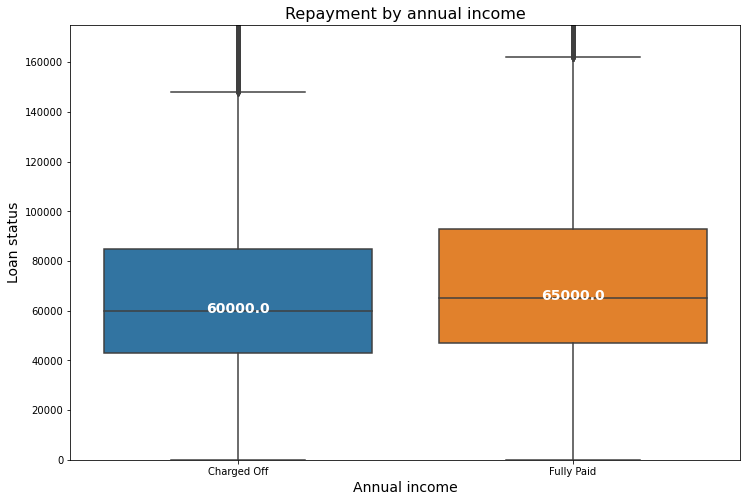

In [55]:
create_median_box(df,'loan_status','annual_inc','Repayment by annual income','Annual income','Loan status',(0,175000))

In [56]:
data1 = df.annual_inc[(df.loan_status == 'Charged Off')].values
data2 = df.annual_inc[(df.loan_status == 'Fully Paid')].values

In [57]:
print('H0 - Mean annual income is the same \nH1 - Mean annual income is different for both groups')

stat, p = ttest_ind(data1,data2)

print(f'stat:{stat:.7f}, p:{p:.22f}')

if p > 0.05:
    print('Probably the same mean')
else:
    print('Different means')

H0 - Mean annual income is the same 
H1 - Mean annual income is different for both groups
stat:-48.4779571, p:0.0000000000000000000000
Different means


### Annual income has the influence on probability of repayment. Means and medians are different for both

## Length of employment and repayment

In [58]:
data1 = df[(df.loan_status == 'Charged Off')].groupby(['emp_length']).count().loan_status.tolist()
data2 = df[(df.loan_status == 'Fully Paid')].groupby(['emp_length']).count().loan_status.tolist()

In [59]:
unpaid_loans = []
paid_loans = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    unpaid_loans.append(a)
    b = data2[counter]/(element+data2[counter])*100
    paid_loans.append(b)
    counter += 1

In [60]:
work_experience = range(0,11,1)
work_experience = [str(i) for i in work_experience]
work_experience[-1] = '10+'

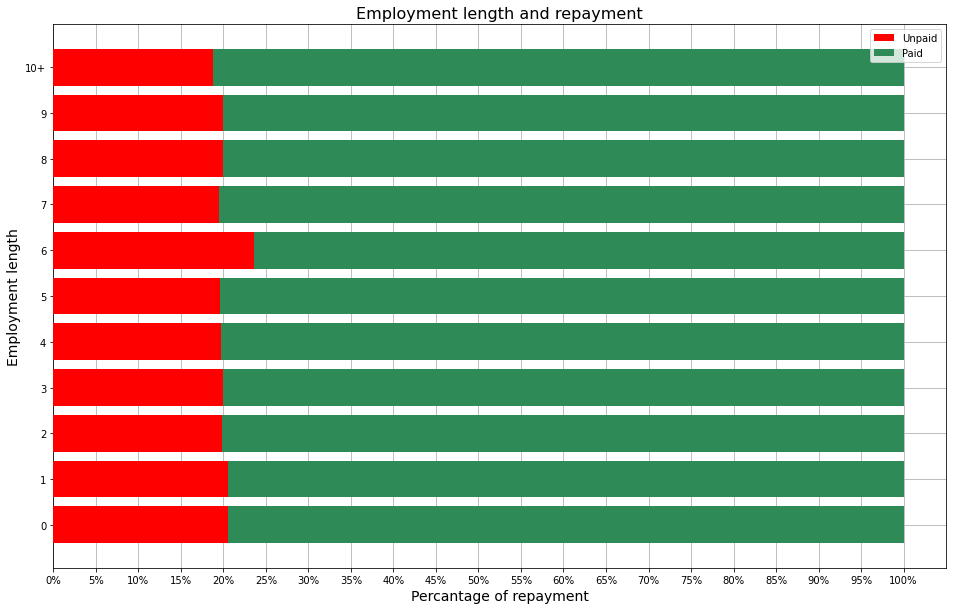

In [61]:
fig, ax = plt.subplots(1,1, figsize=(16,10))

p1 = plt.barh(np.arange(0,11), unpaid_loans, color='red',zorder=3)
p2 = plt.barh(np.arange(0,11), paid_loans, left = unpaid_loans, color='seagreen',zorder=3)

plt.title('Employment length and repayment',size=16)
plt.legend((p1[0], p2[0]), ('Unpaid', 'Paid'))
plt.xlabel('Percantage of repayment',size=14)
plt.ylabel('Employment length',size=14)

ax.grid(zorder=3)
ax.set_xticks(np.arange(0,101,5))
ax.set_xticklabels(percentage)

ax.set_yticks(np.arange(0,11,1))
ax.set_yticklabels(work_experience)

plt.show()

## Repayment and Loan amount

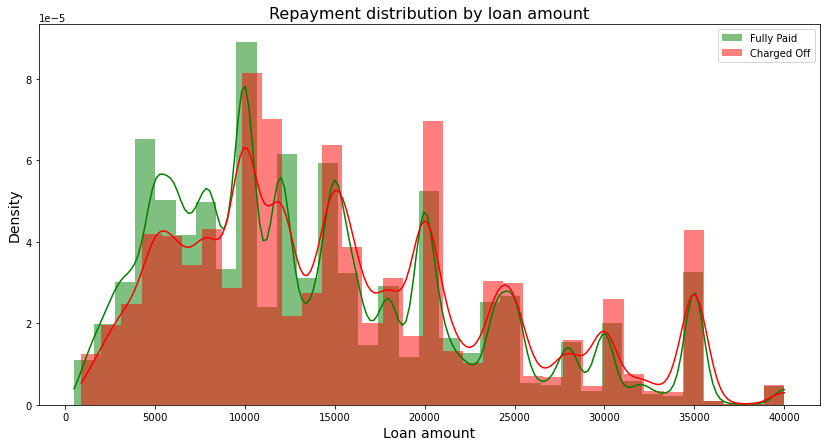

In [62]:
plt.figure(figsize=(14,7))
histplot1 = sns.histplot(df[df['loan_status']=='Fully Paid']['loan_amnt'],bins=35, label='Fully Paid', color="green", kde=True, stat="density", linewidth=0)
histplot2 = sns.histplot(df[df['loan_status']=='Charged Off']['loan_amnt'],bins=35, label='Charged Off', color="red", kde=True, stat="density",linewidth=0)
plt.title('Repayment distribution by loan amount',size=16)
plt.xlabel('Loan amount',size=14)
plt.ylabel('Density',size=14)
plt.legend()
plt.show()

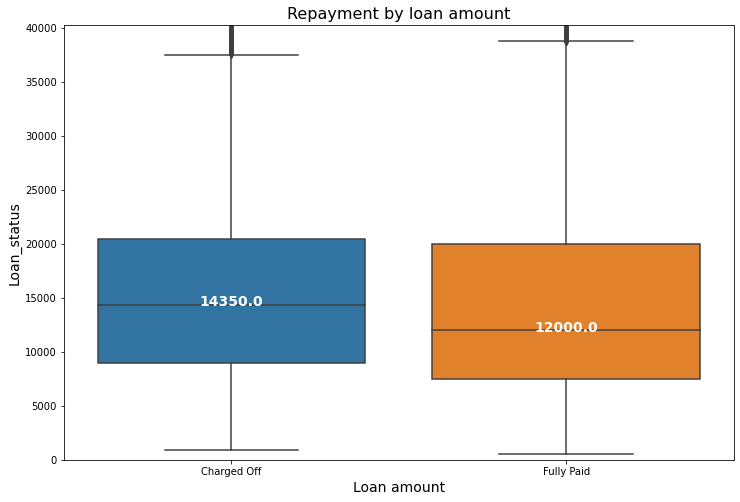

In [63]:
create_median_box(df,'loan_status','loan_amnt','Repayment by loan amount','Loan amount','Loan_status',(0,max(df.loan_amnt)+250))

In [64]:
data1 = df.loan_amnt[(df.loan_status == 'Charged Off')].values
data2 = df.loan_amnt[(df.loan_status == 'Fully Paid')].values

In [65]:
print('H0 - Average loan amount is the same in both groups \nH1 - Average amount is different')
stat, p = ttest_ind(data1,data2)

print(f'stat:{stat:.7f}, p:{p:.22f}')

if p > 0.05:
    print('Probably the same mean')
else:
    print('Different means')

H0 - Average loan amount is the same in both groups 
H1 - Average amount is different
stat:76.2565905, p:0.0000000000000000000000
Different means


### The loan amount is related with probability of paying off the loan. The median for charged off loans are higher than for fully paid.

## Interest rate and repayment

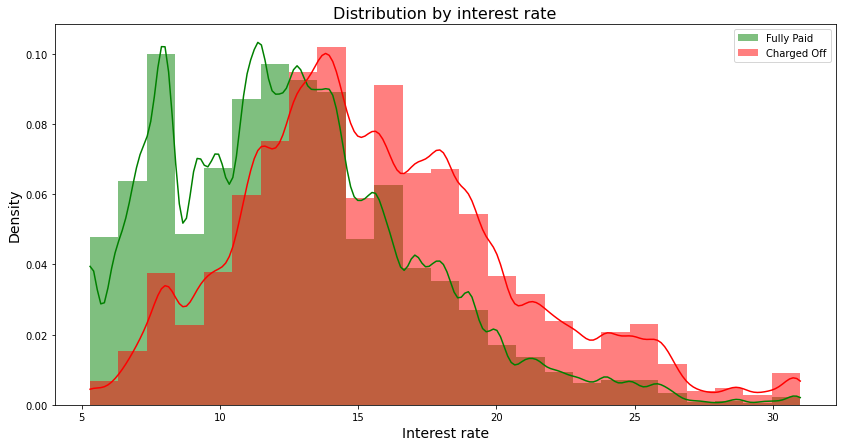

In [66]:
plt.figure(figsize=(14,7))
histplot1 = sns.histplot(df[df['loan_status']=='Fully Paid']['int_rate'],bins=25, label='Fully Paid', color="green", kde=True, stat="density", linewidth=0)
histplot2 = sns.histplot(df[df['loan_status']=='Charged Off']['int_rate'],bins=25, label='Charged Off', color="red", kde=True, stat="density",linewidth=0)
plt.title('Distribution by interest rate',size=16)
plt.xlabel('Interest rate',size=14)
plt.ylabel('Density',size=14)
plt.legend()
plt.show()

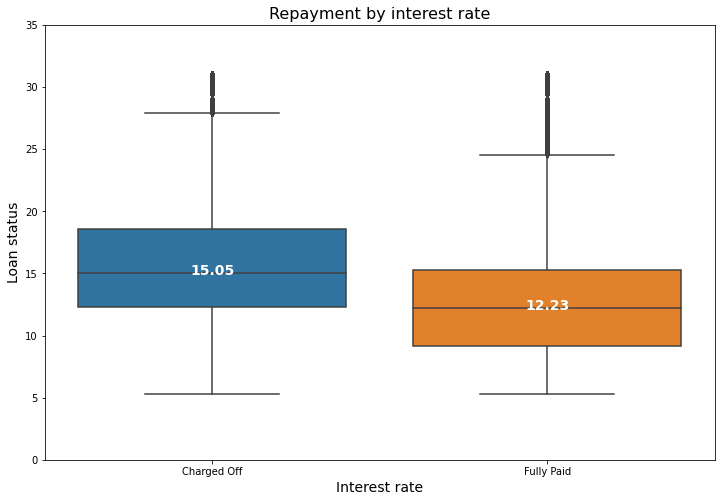

In [67]:
create_median_box(df,'loan_status','int_rate','Repayment by interest rate','Interest rate','Loan status',(0,35))

### Interest rate seems to be one of the most correlated variable with the target. Fully paid loans have usually lower interest rate than charged off loans.

## Term and repayment

In [68]:
data1 = df[(df.loan_status == 'Charged Off')].groupby(['term']).count().loan_status.tolist()
data2 = df[(df.loan_status == 'Fully Paid')].groupby(['term']).count().loan_status.tolist()

In [69]:
unpaid_loans = []
paid_loans = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    unpaid_loans.append(a)
    b = data2[counter]/(element+data2[counter])*100
    paid_loans.append(b)
    counter += 1

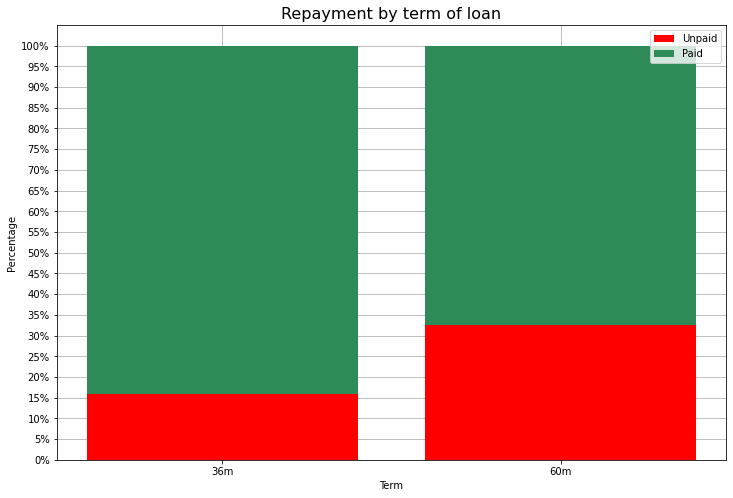

In [70]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

p3 = plt.bar(np.arange(0,2), unpaid_loans, color='red', zorder=3)
p4 = plt.bar(np.arange(0,2), paid_loans, bottom=unpaid_loans, color='seagreen', zorder=3)

plt.title('Repayment by term of loan',size=16)
plt.legend((p3[0],p4[0]), ('Unpaid', 'Paid'))
plt.xlabel('Term')
plt.ylabel('Percentage')

ax.grid(zorder=0)

ax.set_xticks(np.arange(0,2,1))
ax.set_xticklabels(['36m', '60m'])

ax.set_yticks(np.arange(0,101,5))
ax.set_yticklabels(percentage)

plt.show()

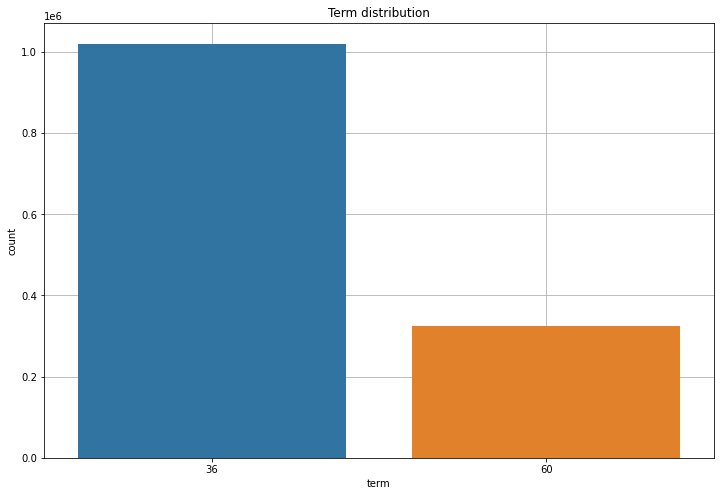

In [71]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.countplot(data=df, x='term',zorder=3)
ax.grid(zorder=0)
plt.title('Term distribution')
plt.show()

### The term of loan is related with paying off the debt. The number of charged off loans is higer for longer term.

## Repayment and purpose

In [72]:
sorted_to_vis = df.sort_values(by=['loan_status','purpose'])

data1 = sorted_to_vis[(sorted_to_vis.loan_status == 'Charged Off')].groupby(['purpose']).count().loan_status.tolist()
data2 = sorted_to_vis[(sorted_to_vis.loan_status == 'Fully Paid')].groupby(['purpose']).count().loan_status.tolist()

In [73]:
unpaid_loans = []
paid_loans = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    unpaid_loans.append(a)
    b = data2[counter]/(element+data2[counter])*100
    paid_loans.append(b)
    counter += 1

In [74]:
purpose_labels = sorted(list(set(sorted_to_vis.purpose.values)))

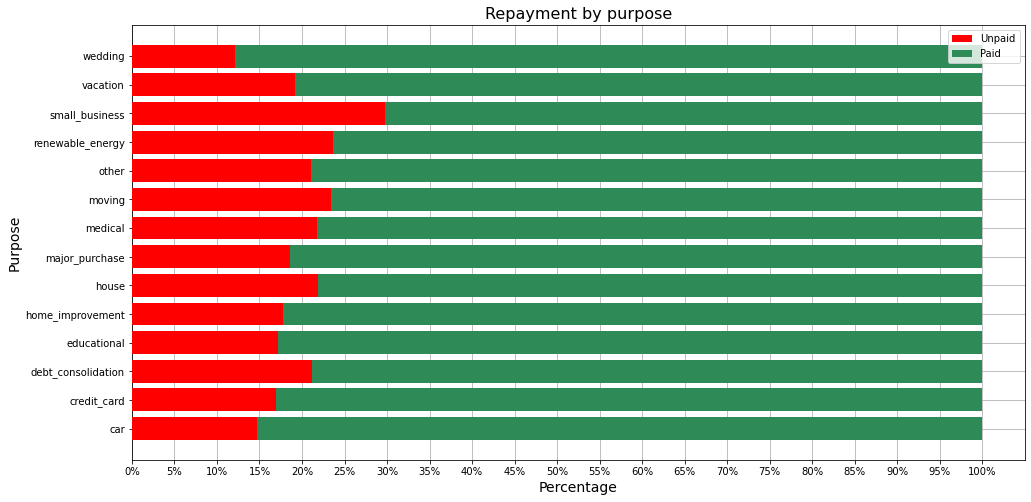

In [75]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

p1 = plt.barh(np.arange(0,14), unpaid_loans, color='red',zorder=3)
p2 = plt.barh(np.arange(0,14), paid_loans, left=unpaid_loans, color='seagreen',zorder=3)

plt.title('Repayment by purpose',size=16)
plt.legend((p1[0], p2[0]), ('Unpaid', 'Paid'))
plt.xlabel('Percentage',size=14)
plt.ylabel('Purpose',size=14)

ax.grid(zorder=0)
ax.set_yticks(np.arange(0,14,1))
ax.set_yticklabels(purpose_labels)

ax.set_xticks(np.arange(0,101,5))
ax.set_xticklabels(percentage)

plt.show()

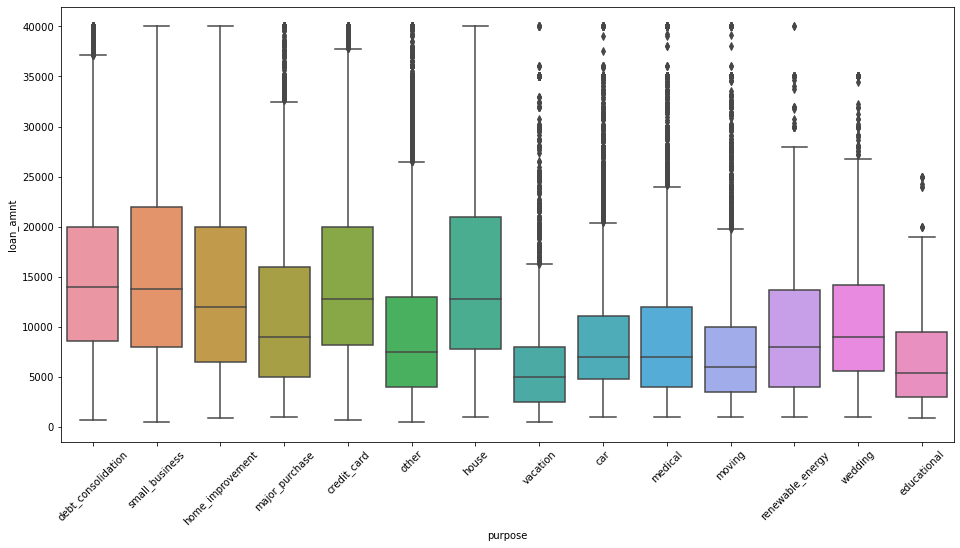

In [76]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
sns.boxplot(data=df,x='purpose',y='loan_amnt')
plt.xticks(rotation=45)

plt.show()

### Purpose has influence on paying off the loan. There are some categories, which have higher risk of charged off like small business, house etc.

## Scatterplot for income and interest rate

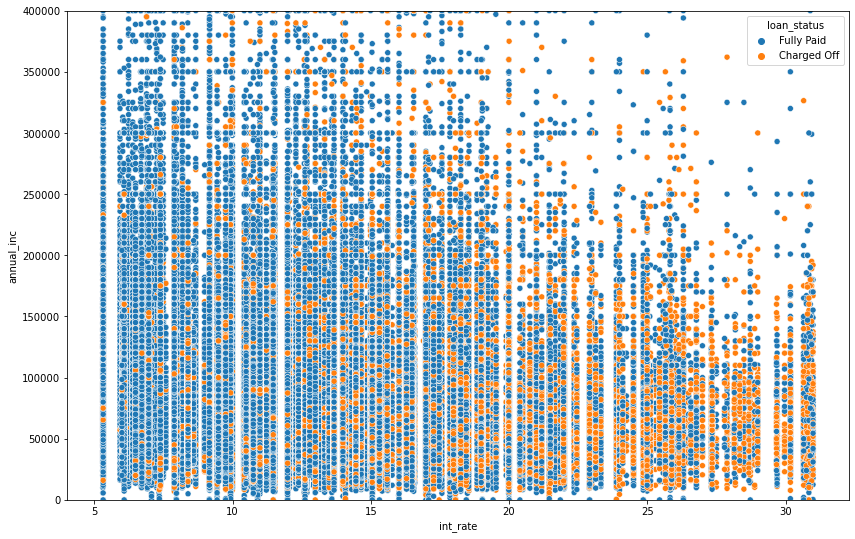

In [77]:
plt.figure(figsize=(14,9))
sns.scatterplot(data=df[0:500000], x="int_rate", y="annual_inc", hue="loan_status")
plt.ylim(0, 400000)
plt.show()

### Concentration of charged off loans is bigger for records with lower annual income and higher interest rate

## Repayment by year

In [78]:
data1 = df[(df.loan_status == 'Charged Off')].groupby(['issue_d_year']).count().loan_status.tolist()
data2 = df[(df.loan_status == 'Fully Paid')].groupby(['issue_d_year']).count().loan_status.tolist()

In [79]:
unpaid_loans = []
paid_loans = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    unpaid_loans.append(a)
    b = data2[counter]/(element+data2[counter])*100
    paid_loans.append(b)
    counter += 1 
years = sorted(df.issue_d_year.unique().tolist())

In [80]:
data_vis = pd.DataFrame(df.groupby('issue_d_year')['loan_status'].value_counts(normalize=True).mul(100).rename('percent')
.reset_index())

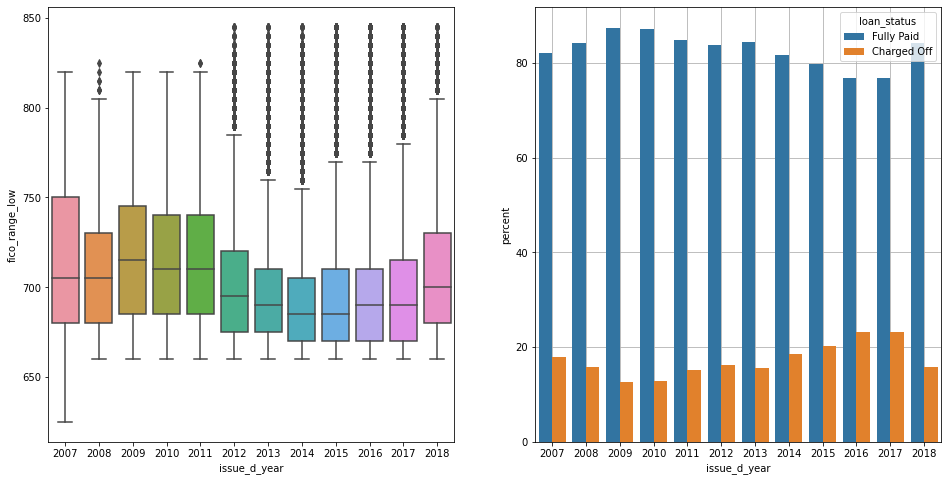

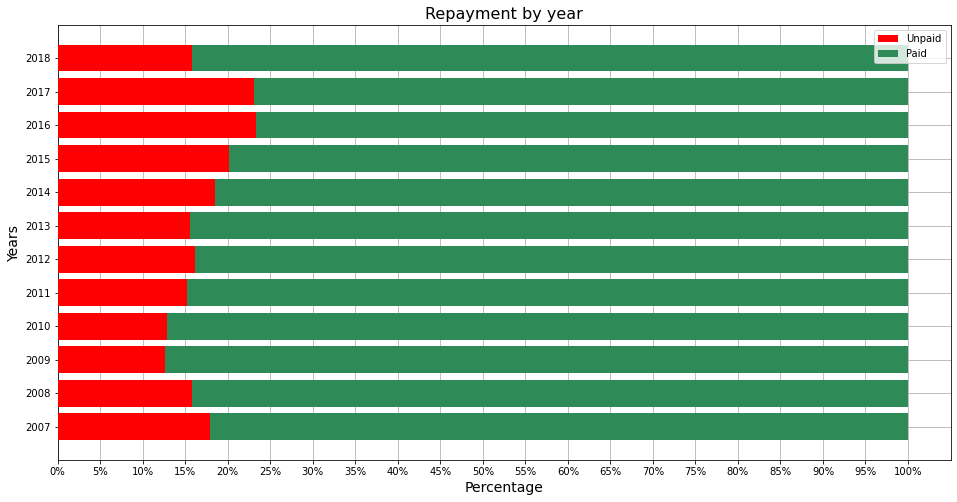

In [81]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(16,8))
sns.boxplot(data=df,x='issue_d_year',y='fico_range_low',ax=ax[0])
sns.barplot(data=data_vis,x='issue_d_year',y='percent',hue='loan_status',ax=ax[1],zorder=3)
ax[1].grid(zorder=0)

plt.show()

fig2, ax2 = plt.subplots(1,1, figsize=(16,8))

p1 = plt.barh(np.arange(0,12), unpaid_loans, color='red', zorder=3)
p2 = plt.barh(np.arange(0,12), paid_loans, left = unpaid_loans, color='seagreen', zorder=3)

plt.title('Repayment by year',size=16)
plt.legend((p1[0], p2[0]), ('Unpaid', 'Paid'))
plt.xlabel('Percentage',size=14)
plt.ylabel('Years',size=14)

ax2.grid(zorder=0)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_xticklabels(percentage)

ax2.set_yticks(np.arange(0,12,1))
ax2.set_yticklabels(years)

plt.show()

### Median of fico for every year is different. In years 2009-2011 there were more loans with higher FICO, which had influence on repayment. Loans in 2014-2017 had lower FICO scoring and bigger share of charged off loans

## Top 10 states by charged off loans

In [82]:
percent_state = df.groupby('addr_state')['loan_status'].value_counts(normalize=True)
percent_state = percent_state.mul(100).rename('Percent')

In [83]:
state_charged_off = []
for i in range(1,len(percent_state),2):
    state_charged_off.append([percent_state.index[i][0],percent_state[i]])
state_df = pd.DataFrame(state_charged_off,columns=['state','percent'])
state_df = state_df.sort_values(by='percent',ascending=False)

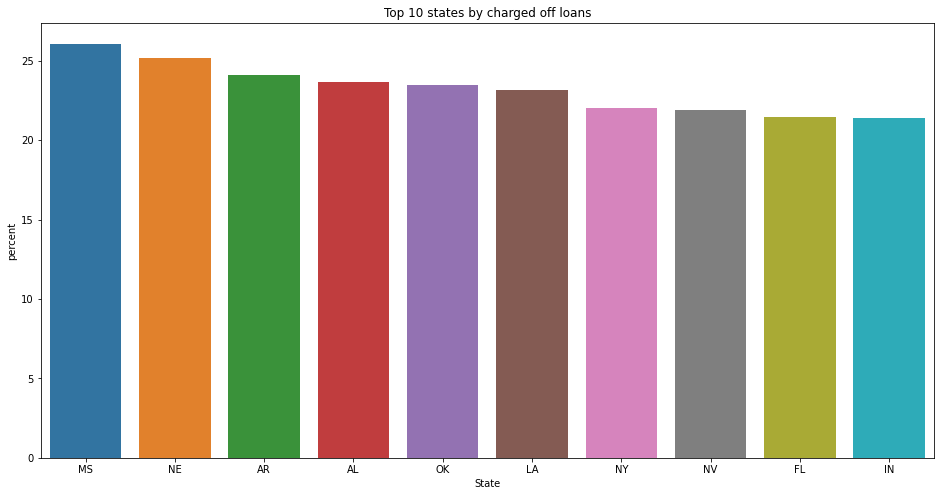

In [84]:
plt.figure(figsize=(16,8))
sns.barplot(x=state_df.state[0:10], y=state_df.percent[0:10])
plt.title('Top 10 states by charged off loans')
plt.xlabel('State')
plt.show()

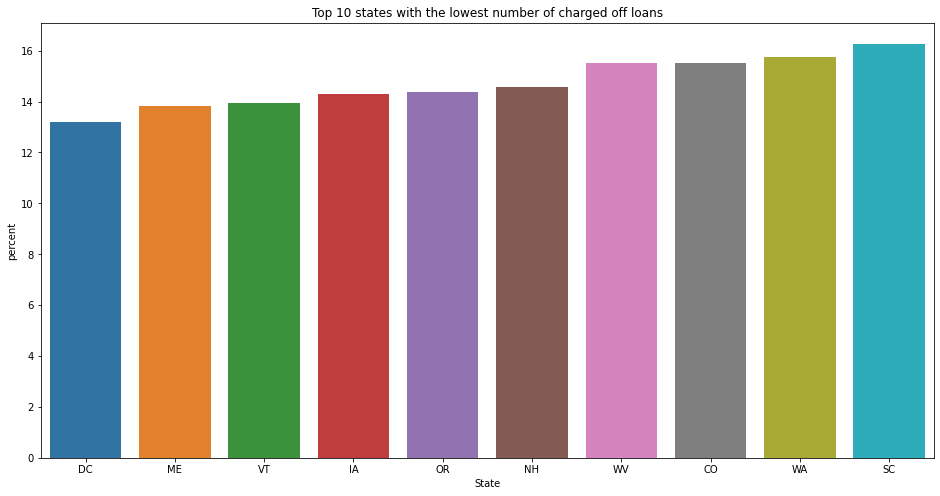

In [85]:
plt.figure(figsize=(16,8))
sns.barplot(x=state_df.state[-1:-11:-1], y=state_df.percent[-1:-11:-1])
plt.title('Top 10 states with the lowest number of charged off loans')
plt.xlabel('State')
plt.show()

### There are states which have higher rate of paid loans

## Top 10 words in titles


In [86]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              85785
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  16659
addr_state                 0
dti                        0
earliest_cr_line           0
fico_range_low             0
pub_rec                    0
revol_bal                  0
revol_util                 0
application_type           0
issue_d_year               0
credit_age                 0
credit_age_rank            0
dtype: int64

In [87]:
df['emp_title'].fillna('no_title',inplace=True)

In [88]:
from textblob import TextBlob

# Creating a string of all the words in emp_title column
count_list = ''
for row in df.emp_title:
    words = row.lower()
    count_list += words + ' '

In [89]:
# counting each word
blob = TextBlob(count_list)
items = blob.word_counts.items()

In [90]:
from operator import itemgetter
import nltk
# removing words which belong to stopwords like "and", "is", "was"
stopwords = nltk.corpus.stopwords.words('english')
items = [item for item in items if item[0] not in stopwords]

In [91]:
# sorting the list
sorted_items = sorted(items, key=itemgetter(1),reverse=True)
sorted_items[0:10]

[('manager', 174163),
 ('no_title', 85785),
 ('director', 44958),
 ('sales', 41943),
 ('assistant', 40908),
 ('supervisor', 33427),
 ('specialist', 31791),
 ('teacher', 31481),
 ('engineer', 30961),
 ('analyst', 30557)]

In [92]:
df_emp_titles = pd.DataFrame(sorted_items[0:10],columns=['title','counts'])

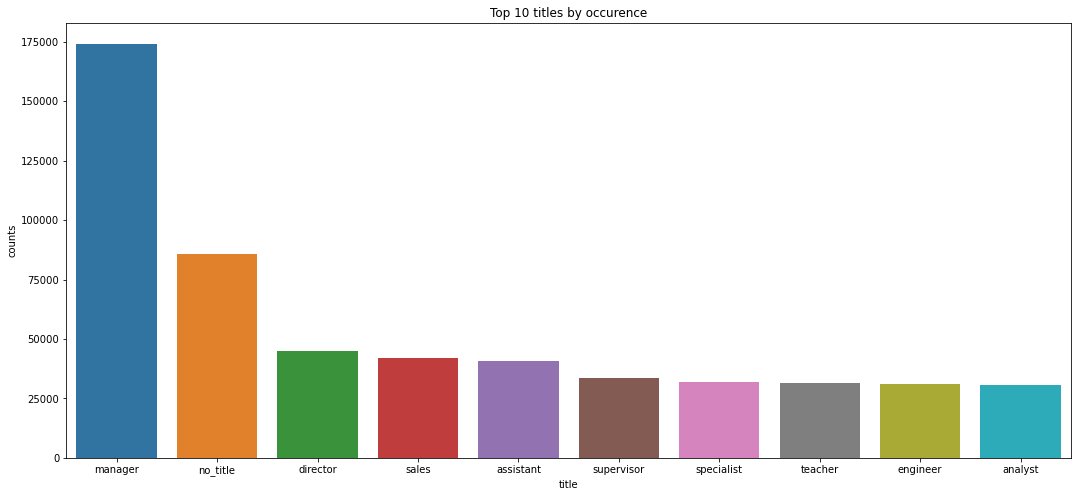

In [93]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_emp_titles,x='title', y='counts')
plt.title('Top 10 titles by occurence')
plt.show()

In [94]:
# function which checking if word occur in each row for emp_title column. It's in binary values (0,1)
def check_word(word):
    binary_list = []
    for row in df.emp_title:
        blob = TextBlob(row.lower())
        if word in blob.words:
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [95]:
# checking 3 the most popular words in emp_title.
df['is_manager'] = check_word('manager')
df['is_no_title'] = check_word('no_title')
df['is_director'] = check_word('director')

### There are few key words which occure in many records. Saving them in binary values can be somehow correlated with the target.

# Encoding and Feature Selection

In [96]:
# creating copy of dataset before encoding
df_no_enc = df.copy()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1345310 non-null  float64
 1   term                 1345310 non-null  int64  
 2   int_rate             1345310 non-null  float64
 3   installment          1345310 non-null  float64
 4   sub_grade            1345310 non-null  object 
 5   emp_title            1345310 non-null  object 
 6   emp_length           1345310 non-null  float64
 7   home_ownership       1345310 non-null  object 
 8   annual_inc           1345310 non-null  float64
 9   verification_status  1345310 non-null  object 
 10  issue_d              1345310 non-null  object 
 11  loan_status          1345310 non-null  object 
 12  purpose              1345310 non-null  object 
 13  title                1328651 non-null  object 
 14  addr_state           1345310 non-null  object 
 15

In [98]:
df.describe(include='object')

sub_grade emp_title home_ownership verification_status   issue_d  \
count    1345310   1345310        1345310             1345310   1345310   
unique        35    378354              6                   3       139   
top           C1  no_title       MORTGAGE     Source Verified  Mar-2016   
freq       85494     85785         665579              521273     48937   

       loan_status             purpose               title addr_state  \
count      1345310             1345310             1328651    1345310   
unique           2                  14               61682         51   
top     Fully Paid  debt_consolidation  Debt consolidation         CA   
freq       1076751              780321              660960     196528   

       application_type  
count           1345310  
unique                2  
top          Individual  
freq            1319510

In [99]:
# Encoding the features and removing values which are no longer useful in my opinion
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

df['loan_status'] = df['loan_status'].apply(lambda row: 0 if row == 'Charged Off' else 1)
df['sub_grade'] = lbl.fit_transform(df.sub_grade)
#df['application_type'] = lbl.fit_transform(df.application_type)

df.drop(columns=['issue_d','title','emp_title','addr_state','issue_d_year'],inplace=True)

In [100]:
one_hot_df = pd.get_dummies(data=df,columns=['home_ownership','verification_status','purpose'])

In [101]:
one_hot_df.isnull().any().any()

False

In [102]:
one_hot_df.corr().abs()['loan_status'].sort_values()[15::]

purpose_car                            0.013837
purpose_home_improvement               0.014826
is_director                            0.018952
verification_status_Source Verified    0.019743
revol_bal                              0.020010
pub_rec                                0.026194
purpose_small_business                 0.026253
credit_age                             0.033406
credit_age_rank                        0.034061
purpose_debt_consolidation             0.034820
purpose_credit_card                    0.040272
is_no_title                            0.040612
annual_inc                             0.041759
earliest_cr_line                       0.044054
installment                            0.051701
revol_util                             0.060029
verification_status_Verified           0.065409
loan_amnt                              0.065604
home_ownership_RENT                    0.066086
home_ownership_MORTGAGE                0.068199
dti                                    0

In [103]:
# choosing features to training model
feature_selection = one_hot_df.corr().abs()['loan_status'].sort_values().index.tolist()[15::]

In [104]:
feature_selection

['purpose_car',
 'purpose_home_improvement',
 'is_director',
 'verification_status_Source Verified',
 'revol_bal',
 'pub_rec',
 'purpose_small_business',
 'credit_age',
 'credit_age_rank',
 'purpose_debt_consolidation',
 'purpose_credit_card',
 'is_no_title',
 'annual_inc',
 'earliest_cr_line',
 'installment',
 'revol_util',
 'verification_status_Verified',
 'loan_amnt',
 'home_ownership_RENT',
 'home_ownership_MORTGAGE',
 'dti',
 'verification_status_Not Verified',
 'fico_range_low',
 'term',
 'int_rate',
 'sub_grade',
 'loan_status']

In [105]:
# chosing columns to delate which are not presented in feature selection
columns_to_delete = [column for column in one_hot_df.columns if column not in feature_selection]
one_hot_df.drop(columns=columns_to_delete,axis='columns',inplace=True)

## Heatmap

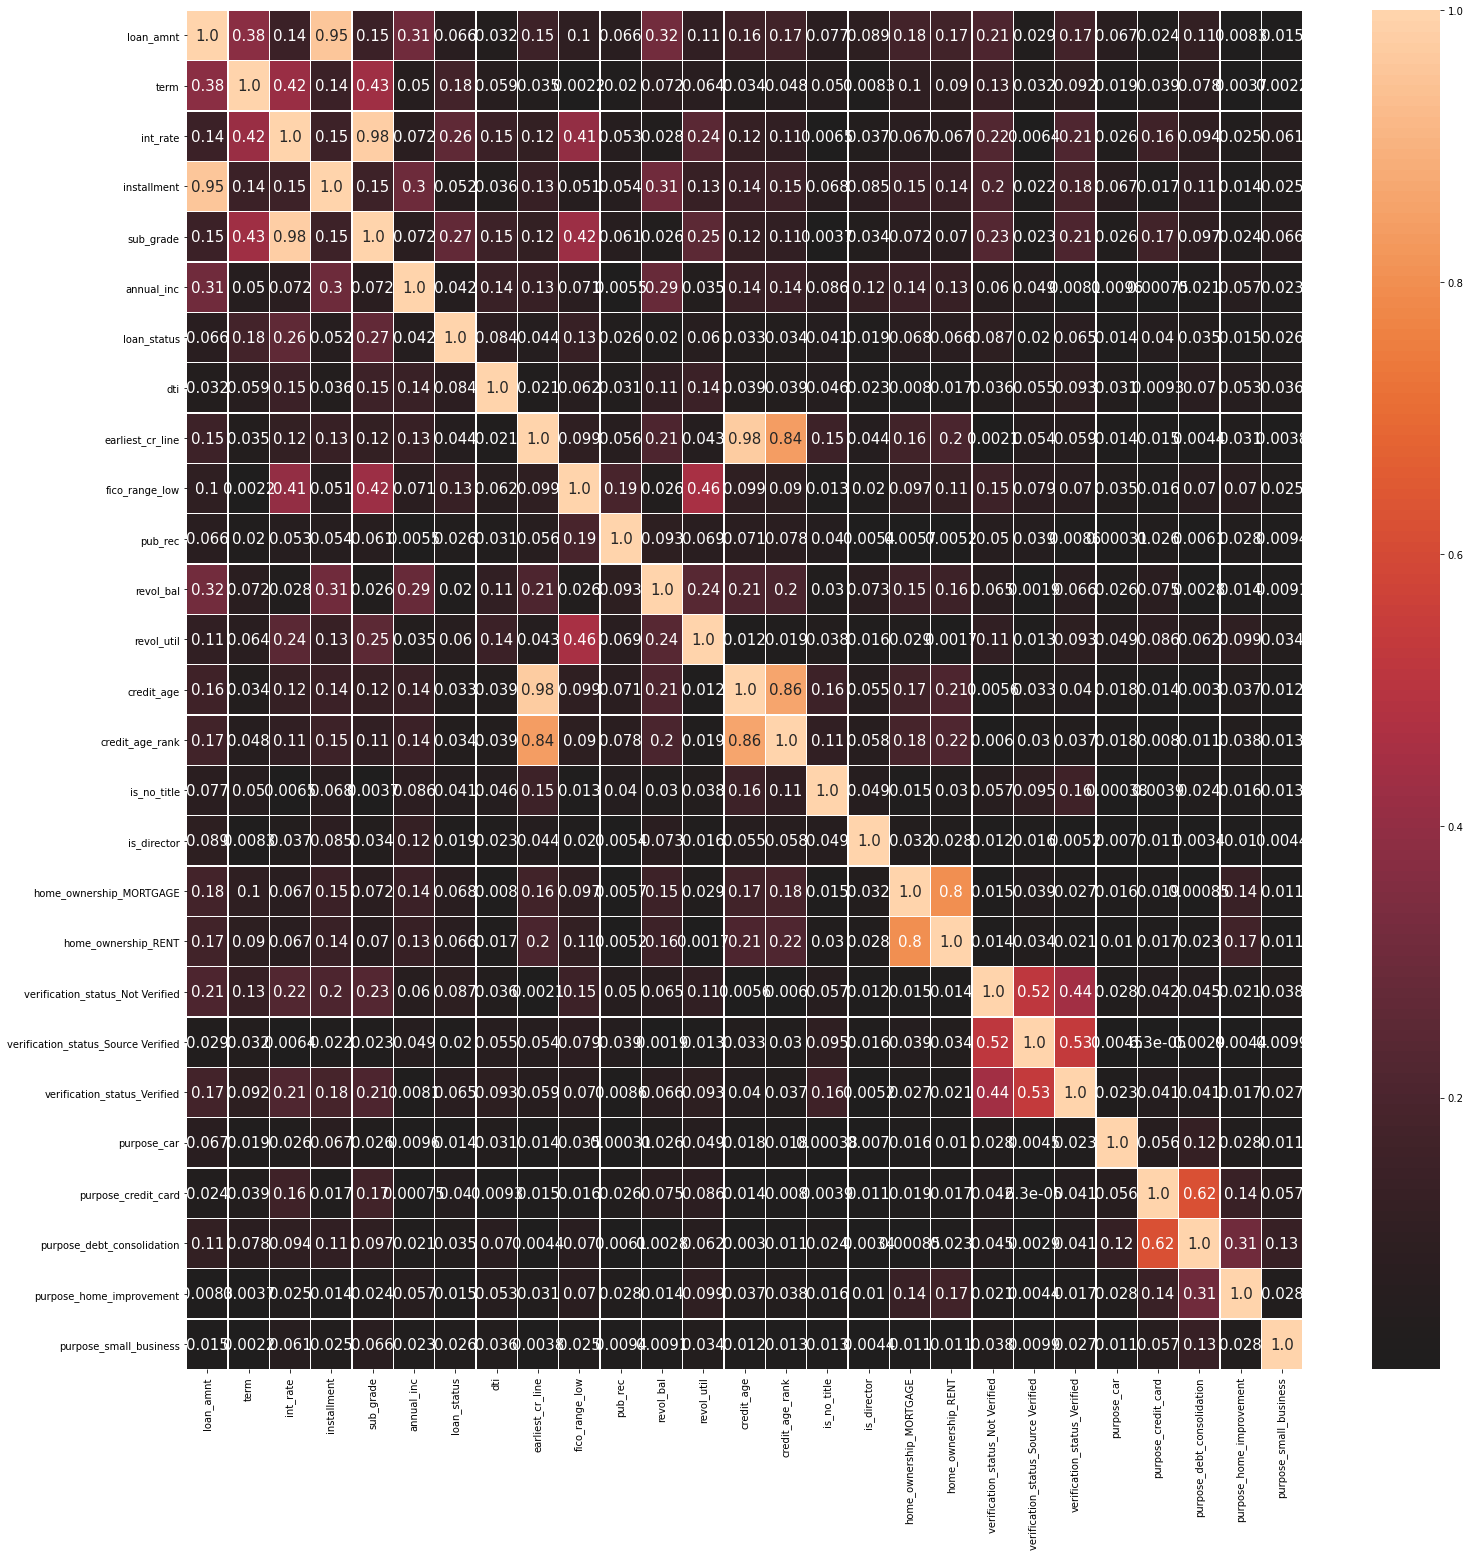

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(one_hot_df.corr().abs(), center=0, annot_kws={'size': 15},annot=True,linewidths=0.5, fmt='.2')
plt.show()

In [107]:
# Delating features which are too strong correlated with other variables
one_hot_df.drop(columns=['credit_age','credit_age_rank','sub_grade'],axis='columns',inplace=True)

### The most correlated variables are subgrade, interest rate and term.

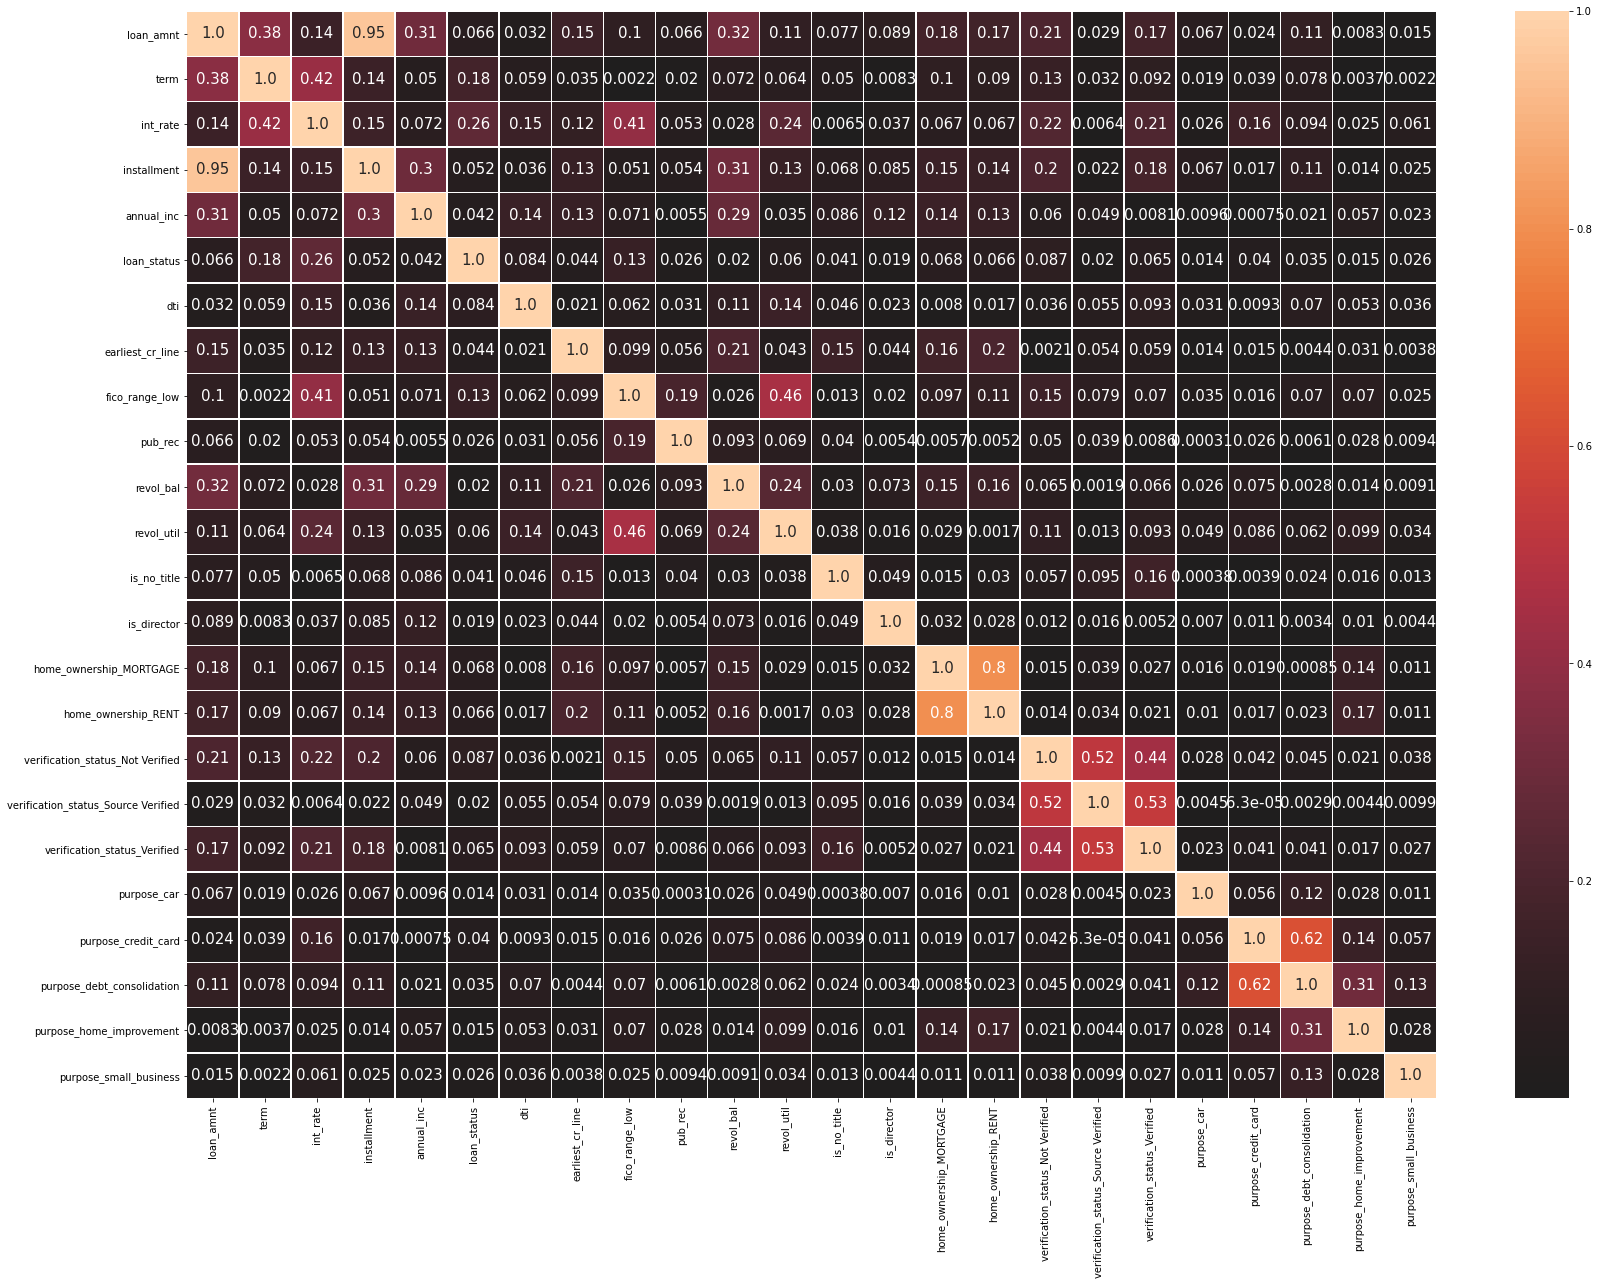

In [108]:
plt.figure(figsize=(28,20))
sns.heatmap(one_hot_df.corr().abs(), center=0, annot_kws={'size': 15},annot=True,linewidths=0.5, fmt='.2')
plt.show()

# Modelling

In [109]:
from sklearn.preprocessing import StandardScaler

from math import sqrt
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [110]:
target = one_hot_df['loan_status']
data = one_hot_df.loc[:, one_hot_df.columns != 'loan_status']

## Clustering

In [111]:
from sklearn.cluster import KMeans

# Choosing numbers of clusters by elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[4882278138563950.0, 3032733923767352.0, 2210357486223222.0, 1756844349873403.0, 1486735600208101.5, 1274287796027460.0, 1100785761882178.9, 960788787224369.0]


In [112]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

clusters          wcss
0         1  4.882278e+15
1         2  3.032734e+15
2         3  2.210357e+15
3         4  1.756844e+15
4         5  1.486736e+15

In [113]:
px.line(data_frame=wcss, x='clusters',y='wcss',width=800, height=500,title=' Elbow Method')

In [114]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [115]:
kmeans = KMeans(n_clusters=3, random_state=1610)
kmeans = kmeans.fit(scaled_features)

print('clusters:', kmeans.labels_)
print('inertia:', kmeans.inertia_)

clusters: [2 2 2 ... 0 2 2]
inertia: 26518594.70222551


In [116]:
predictions = kmeans.predict(scaled_features)
unique,counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

countstscldf = pd.DataFrame(counts,columns = ['Cluster 0', 'Cluster 1', 'Cluster 2'])

countstscldf

Cluster 0  Cluster 1  Cluster 2
0     521235     419213     404862

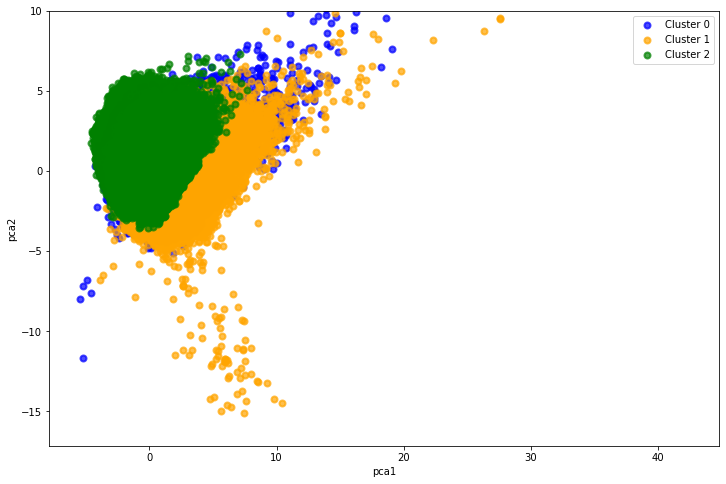

In [117]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = scaled_features
y_num = predictions


target_names = ['Cluster 0', 'Cluster 1','Cluster 2']

pca = PCA(n_components=2, random_state=451)
X_r = pca.fit(scaled_features).transform(scaled_features)

plt.figure(figsize=(12,8))
colors = ['blue','orange','green']
lw = 2

for color,j,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r[y_num==j,0], X_r[y_num == j,1],color=color, alpha=.7, lw=lw, label=target_name, cmap='Spectral')
plt.ylim(top=10)
plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [118]:
clusters = kmeans.labels_

In [119]:
# adding loan_status to check repayment for clusters
data['clusters'] = clusters
data['loan_status'] = target

In [120]:
data1 = data[(data.loan_status == 0)].groupby(['clusters']).count().pub_rec.tolist()
data2 = data[(data.loan_status == 1)].groupby(['clusters']).count().pub_rec.tolist()

In [121]:
# checking repayment for each cluster
counter = 0
for d in data1:
    print('Unpaid for cluster nr: ', counter, ' - ', d/(d+data2[counter]), ', records: ', d+data2[counter])
    counter +=1

Unpaid for cluster nr:  0  -  0.20954655769470584 , records:  521235
Unpaid for cluster nr:  1  -  0.23915050344335695 , records:  419213
Unpaid for cluster nr:  2  -  0.14592873621135102 , records:  404862


In [122]:
data1 = data[(data.term == 36)].groupby(['clusters']).count().pub_rec.tolist()
data2 = data[(data.term == 60)].groupby(['clusters']).count().pub_rec.tolist()
list_36 = []
list_60 = []
counter = 0
for element in data1:
    a = data1[counter]/(element+data2[counter])*100
    list_36.append(a)
    b = data2[counter]/(element+data2[counter])*100
    list_60.append(b)
    counter += 1

In [123]:
Clusters = ['Cluster 0','Cluster 1','Cluster 2']

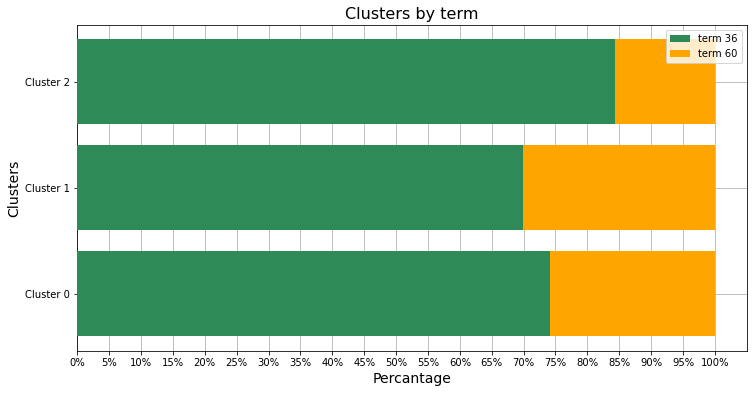

In [124]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

p1 = plt.barh(np.arange(0,3), list_36, color='seagreen', zorder=3)
p2 = plt.barh(np.arange(0,3), list_60, left=list_36, color='orange', zorder=3)

plt.title('Clusters by term',size=16)
plt.legend((p1[0], p2[0]), ('term 36', 'term 60'))
plt.xlabel('Percantage',size=14)
plt.ylabel('Clusters',size=14)

ax.grid(zorder=0)
ax.set_xticks(np.arange(0,101,5))
ax.set_xticklabels(percentage)

ax.set_yticks(np.arange(0,3,1))
ax.set_yticklabels(Clusters)

plt.show()

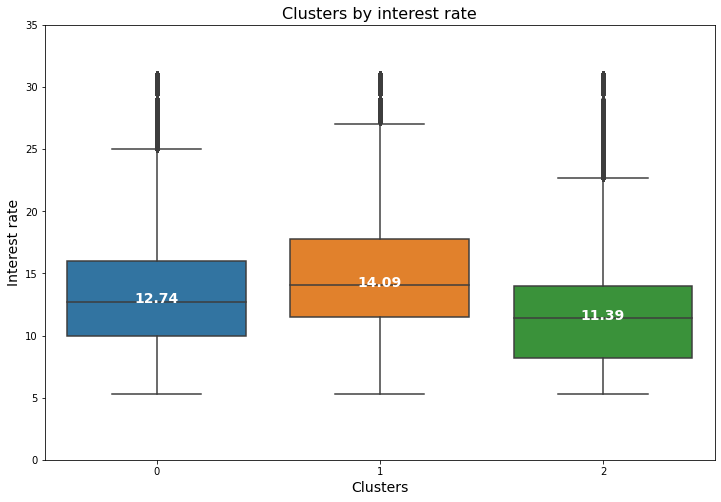

In [125]:
create_median_box(data,'clusters','int_rate','Clusters by interest rate','Clusters','Interest rate',(0,35))

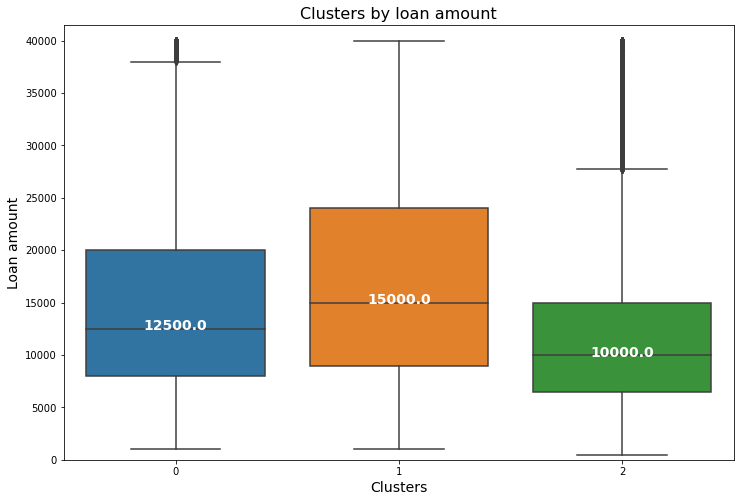

In [126]:
create_median_box(data,'clusters','loan_amnt','Clusters by loan amount','Clusters','Loan amount',(0,max(data.loan_amnt)+1500))

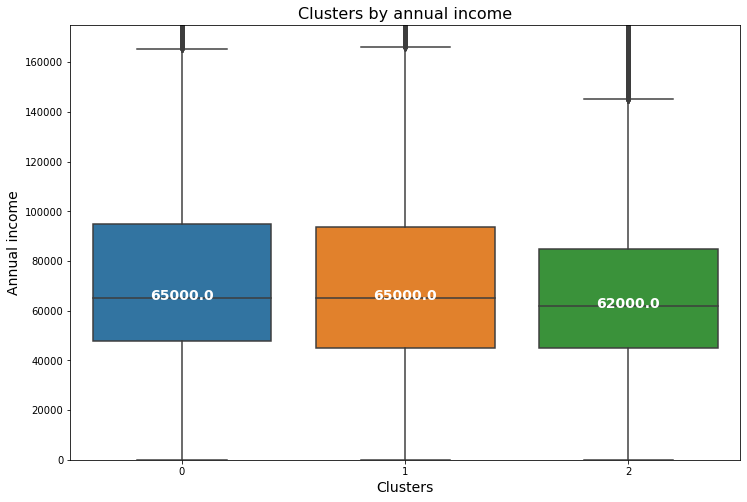

In [127]:
create_median_box(data,'clusters','annual_inc','Clusters by annual income','Clusters','Annual income',(0,175000))

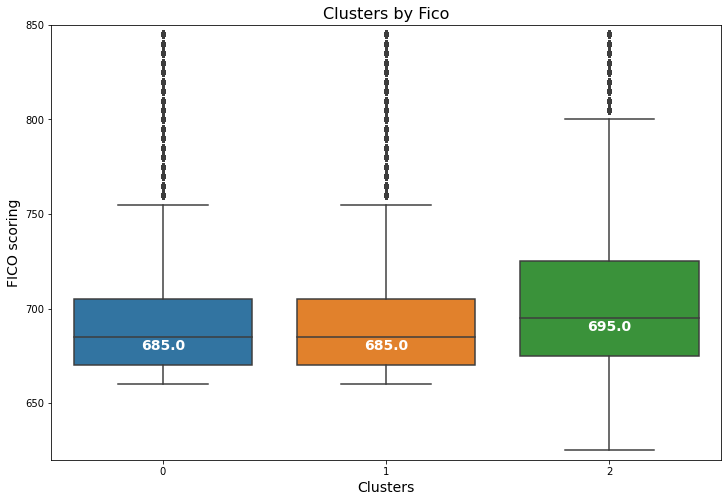

In [128]:
create_median_box(data,'clusters','fico_range_low','Clusters by Fico','Clusters','FICO scoring',(620,max(data.fico_range_low)+5))

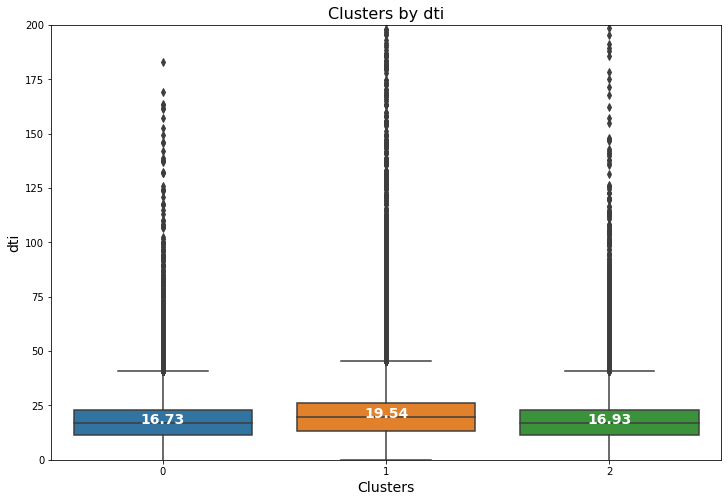

In [129]:
create_median_box(data,'clusters','dti','Clusters by dti','Clusters','dti',(0,200))

### There are some differances between clusters. The cluster with the largest amount of repaid loans has the biggest Fico, the lowest interest rate, the lowest loan amount and the biggest number of 36 month loans. 

## Modelling

In [130]:
data = data.drop(columns=['clusters','loan_status'])

In [131]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'fico_range_low', 'pub_rec', 'revol_bal',
       'revol_util', 'is_no_title', 'is_director', 'home_ownership_MORTGAGE',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_small_business'],
      dtype='object')

In [132]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=8,stratify=target)

In [133]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [134]:
LR = LogisticRegression(max_iter=10000,random_state=1610)
LR.fit(x_train,y_train)
print('Score: ',LR.score(x_test,y_test))

prediction = LR.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.8012019534531074


array([[  4099,  49613],
       [  3876, 211474]])

In [135]:
model_dt = DecisionTreeClassifier(random_state=1610)
model_dt.fit(x_train,y_train)
print('Score: ',model_dt.score(x_test,y_test))

prediction = model_dt.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.7009611167686258


array([[ 15753,  37959],
       [ 42501, 172849]])

In [136]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=1610)

param_grid = {
    'criterion': ['gini'],
    'max_depth': np.arange(5,11,1)
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc',cv=3)
grid_search.fit(x_train,y_train)

grid_search.score(x_test,y_test)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [137]:
model_dt = DecisionTreeClassifier(random_state=1610,criterion='gini',max_depth=8)
model_dt.fit(x_train,y_train)
print('Score: ',model_dt.score(x_test,y_test))

prediction = model_dt.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.8013580513041604


array([[  2952,  50760],
       [  2687, 212663]])

In [138]:
model_rfc = RandomForestClassifier(random_state=1610,max_depth=30)
model_rfc.fit(x_train,y_train)
print('Score: ',model_rfc.score(x_test,y_test))

prediction = model_rfc.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.801395217459173


array([[  4293,  49419],
       [  4018, 211332]])

In [139]:
'''
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(random_state=1610,criterion='entropy')

param_grid = {
    'max_depth': np.arange(5,16,5),
    'n_estimators': np.arange(80,170,25)
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc',cv=3)
grid_search.fit(x_train,y_train)

grid_search.score(x_test,y_test)
grid_search.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nclassifier = RandomForestClassifier(random_state=1610,criterion='entropy')\n\nparam_grid = {\n    'max_depth': np.arange(5,16,5),\n    'n_estimators': np.arange(80,170,25)\n}\n\ngrid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc',cv=3)\ngrid_search.fit(x_train,y_train)\n\ngrid_search.score(x_test,y_test)\ngrid_search.best_params_\n"

In [140]:
model_rfc = RandomForestClassifier(random_state=1610,criterion='entropy',max_depth=15,n_estimators=125)
model_rfc.fit(x_train,y_train)
print('Score: ',model_rfc.score(x_test,y_test))

prediction = model_rfc.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.8025176353405534


array([[  2598,  51114],
       [  2021, 213329]])

In [141]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train,y_train)
print('Score: ',model_ada.score(x_test,y_test))

prediction = model_ada.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.8019081103983469


array([[  3337,  50375],
       [  2924, 212426]])

In [142]:
'''
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
print('Score: ',model_knn.score(x_test,y_test))

prediction = model_knn.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)
'''

"\nmodel_knn = KNeighborsClassifier()\nmodel_knn.fit(x_train,y_train)\nprint('Score: ',model_knn.score(x_test,y_test))\n\nprediction = model_knn.predict(X=x_test)\nexpected = y_test\nconfusion_matrix(y_true=expected, y_pred=prediction)\n"

In [143]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# model random
ns_probs = [0 for _ in range(len(y_test))]
# Logistic regression
lr_probs = LR.predict_proba(x_test)
lr_probs = lr_probs[:,1]
# Random forests
rfc_probs = model_rfc.predict_proba(x_test)
rfc_probs = rfc_probs[:,1]
# Decision tree
dt_probs = model_dt.predict_proba(x_test)
dt_probs = dt_probs[:,1]
# KNeighbours
'''
knn_probs = model_knn.predict_proba(x_test)
knn_probs = knn_probs[:,1]
'''
# Ada Boost
ada_probs = model_ada.predict_proba(x_test)
ada_probs = ada_probs[:,1]
# measurment
ns_auc = roc_auc_score(y_test,ns_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
rfc_auc = roc_auc_score(y_test,rfc_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
ada_auc = roc_auc_score(y_test,ada_probs)
#knn_auc = roc_auc_score(y_test,knn_probs) 

print('RANDOM: ', ns_auc)
print('LR: ', lr_auc)
print('RFC: ', rfc_auc)
print('DT: ', dt_auc)
print('ADA: ', ada_auc)
#print('KNN: ', knn_auc)

RANDOM:  0.5
LR:  0.705908481433782
RFC:  0.7132868017675849
DT:  0.7020169388904831
ADA:  0.7069766448758279


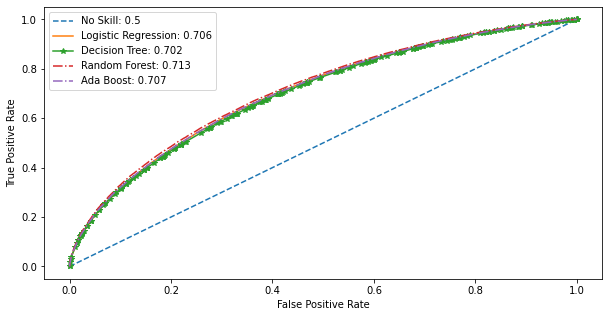

In [144]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
#knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill: ' + str(ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression: '+ str(f'{lr_auc:.3f}'))
plt.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree: '+ str(f'{dt_auc:.3f}'))
plt.plot(rfc_fpr, rfc_tpr, linestyle='-.', label='Random Forest: '+ str(f'{rfc_auc:.3f}'))
plt.plot(ada_fpr, ada_tpr, linestyle='-.', label='Ada Boost: '+ str(f'{ada_auc:.3f}'))
#plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNeigbours: '+ str(f'{knn_auc:.3f}'))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### The best score got Random forest. K-Nearest Neigbhours and Decision Tree achieved worse score.

# Oversampling

In [145]:
from imblearn.over_sampling import SMOTE

# oversampling the data
smk = SMOTE(random_state=913)
data2,target2= smk.fit_resample(data,target)

In [146]:
print(len(data2))
print(len(data))
print(len(target2))
print(len(target))

2153502
1345310
2153502
1345310


# Final model

In [147]:
x_train, x_test, y_train, y_test = train_test_split(data2, target2, test_size=0.20, random_state=8)

In [148]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [149]:
# Grabing the names of features
features = data.columns.tolist()

In [150]:
LR = LogisticRegression(random_state=1610, max_iter=10000)
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

prediction = LR.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

array([[159144,  56279],
       [ 25762, 189516]])

In [151]:
model_rfc = RandomForestClassifier(random_state=1610)
model_rfc.fit(x_train,y_train)
model_rfc.score(x_test,y_test)

prediction = model_rfc.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

array([[166410,  49013],
       [ 12529, 202749]])

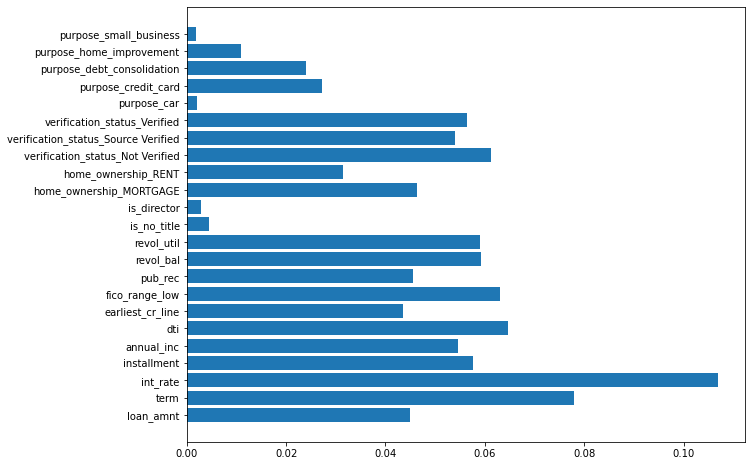

In [152]:
# checking feature importance for the Random Forest
importance = model_rfc.feature_importances_
plt.subplots(1,1,figsize=(10,8))
plt.barh(features, importance)
plt.show()

In [153]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train,y_train)
model_ada.score(x_test,y_test)

prediction = model_ada.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

array([[162396,  53027],
       [ 21382, 193896]])

In [154]:
# Random forests
# model random
ns_probs = [0 for _ in range(len(y_test))]
# Logistic regression
lr_probs = LR.predict_proba(x_test)
lr_probs = lr_probs[:,1]
# random forests
rfc_probs = model_rfc.predict_proba(x_test)
rfc_probs = rfc_probs[:,1]
# random forests
ada_probs = model_ada.predict_proba(x_test)
ada_probs = ada_probs[:,1]

lr_auc = roc_auc_score(y_test,lr_probs)
rfc_auc = roc_auc_score(y_test,rfc_probs)
ada_auc = roc_auc_score(y_test,ada_probs)

print('LR: ', lr_auc)
print('RFC: ', rfc_auc)
print('ADA: ', ada_auc)

LR:  0.888139468731152
RFC:  0.9203597118172744
ADA:  0.9008555462765995


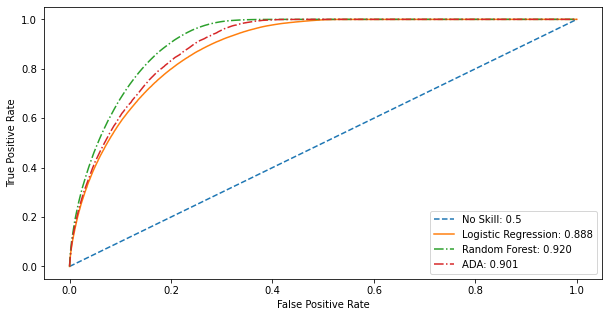

In [155]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)

plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill: ' + str(ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression: '+ str(f'{lr_auc:.3f}'))
plt.plot(rfc_fpr, rfc_tpr, linestyle='-.', label='Random Forest: '+ str(f'{rfc_auc:.3f}'))
plt.plot(ada_fpr, ada_tpr, linestyle='-.', label='ADA: '+ str(f'{ada_auc:.3f}'))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [156]:
'''
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(random_state=1610)

param_grid = {
    'criterion': ['entropy'],
    'max_depth': np.arange(10,31,10),
    'n_estimators': np.arange(110,141,10)
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc',cv=3)
grid_search.fit(x_train,y_train)

grid_search.score(x_test,y_test)
grid_search.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nclassifier = RandomForestClassifier(random_state=1610)\n\nparam_grid = {\n    'criterion': ['entropy'],\n    'max_depth': np.arange(10,31,10),\n    'n_estimators': np.arange(110,141,10)\n}\n\ngrid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc',cv=3)\ngrid_search.fit(x_train,y_train)\n\ngrid_search.score(x_test,y_test)\ngrid_search.best_params_\n"

In [157]:
# based on grid search
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

scalar = StandardScaler()
clf = RandomForestClassifier(max_depth=30,n_estimators=130,criterion='entropy')
pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])
cv = KFold(n_splits=5)
data2_sf,target2_sf = shuffle(data2, target2)
scores = cross_val_score(pipeline, data2_sf,target2_sf, cv=cv, scoring='roc_auc')

In [158]:
scores.mean()

0.9206737132208114